In [1]:
# Major Libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("diabetic_data.csv", na_values="?")

C:\Users\CHANDIMA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Preprocessing

Features like "encounter_id", "patient_nbr" and "payer_code" are not contributed to decide the readmission status. They can be removed.

Missing data should be replaced or removed.
"age" should be label-encoded into an integer.
Useless features should be removed.
'diag_1', 'diag_2', 'diag_3' can be indicated as ICD9 codes. (Primary, Secondary & Tertiary Medica Diagnoses).

Categorical data should be encoded.

Feature Scaling should be applied.



As 97% of data is missing. "weight" can be removed.
"payer_code" has no effect on the readmission status. So it can be removed.

"diag_1, diag_2, and diag_3" records with missing values will be ignored in the final analysis.


As the majority of the data is missing, "medical_specialty" will be ignored in the final analysis.

In [3]:
# allow plots to appear in the notebook
%matplotlib inline


In [4]:
#Remove useless features
dataset.drop(['encounter_id', 'patient_nbr',  'weight', 'payer_code',  'medical_specialty',  'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone', 'metformin_rosiglitazone', 'metformin_pioglitazone' ], axis=1, inplace=True)

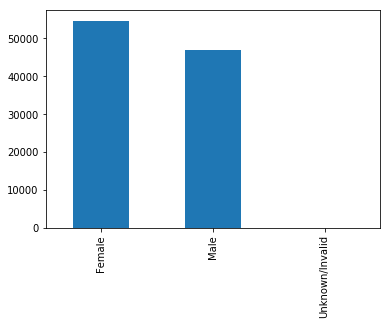

In [5]:
dataset.gender.value_counts().plot(kind='bar')

In [6]:
dataset['gender'].value_counts().head()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [7]:
# In the feature "gender", there are 03 invalid data which should be removed.
dataset = dataset[dataset.gender != 'Unknown/Invalid']

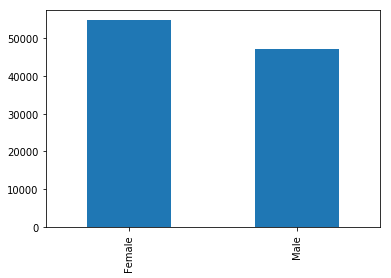

In [8]:
dataset.gender.value_counts().plot(kind='bar')

In [9]:
# Removing rows which has missing values in "race", "diag_1", "diag_2", "diag_3"
finalDataset = dataset.dropna()

In [10]:
finalDataset.shape

(98052, 21)

In [12]:
print(finalDataset.isnull().sum())

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64


In [13]:
finalDataset.shape

(98052, 21)

In [14]:
finalDataset.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [15]:
# ICD9 Codes for diag_1, diag_2 and diag_3
def ICD9_classifier(diagnoses):
    # Returns a series of strings corresponding to type of ICD9 diagnosis
    # diagnoses is a list
    gr_diagnoses = diagnoses.copy()
    icd9_dct = {
                'Infectious':(1, 139),
                'Neoplasmic':(140,239),
                'Hormonal':(240, 279),
                'Blood':(280,289),
                'Mental':(290,319),
                'Nervous':(320,359),
                'Sensory':(360,389),
                'Circulatory':(390,459),
                'Respiratory':(460,519),
                'Digestive':(520,579),
                'Genitourinary':(580,629),
                'Childbirth':(630,679),
                'Dermatological':(680,709),
                'Musculoskeletal':(710,739),
                'Congenital':(740,759),
                'Perinatal':(760,779),
                'Miscellaneous':(780,799),
                'Injury':(800,999)
               }
    for i, diagnosis in enumerate(diagnoses):
        if (str(diagnoses[i])[0] == 'E') or (str(diagnoses[i])[0] == 'V'):
            gr_diagnoses[i] = 'Accidental'
        elif (str(diagnoses[i]).lower() == 'nan'):
            gr_diagnoses[i] = 'NaN'
        else:
            for key, icd_range in icd9_dct.items():
                if (int(float(diagnoses[i])) >= icd_range[0]) and (int(float(diagnoses[i])) <= icd_range[1]):
                    gr_diagnoses[i] = key
    return gr_diagnoses

In [16]:
d1 = ICD9_classifier(finalDataset.diag_1.values)
d2 = ICD9_classifier(finalDataset.diag_2.values)
d3 = ICD9_classifier(finalDataset.diag_3.values)


finalDataset.diag_1 = d1
finalDataset.diag_2 = d2
finalDataset.diag_3 = d3

C:\Users\CHANDIMA\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
finalDataset.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,0,0,Hormonal,Hormonal,Hormonal,9,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,1,Childbirth,Hormonal,Accidental,6,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,0,Infectious,Hormonal,Circulatory,7,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,0,Neoplasmic,Neoplasmic,Hormonal,5,Steady,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,0,0,Circulatory,Circulatory,Hormonal,9,Steady,No,Yes,>30


In [ ]:

# Label-encode age feature to an integer in the center of the raw bin
finalDataset.age = (LabelEncoder().fit_transform(finalDataset.age)*10) + 5

#  Encoding - Categorical Data
lb = LabelEncoder()
finalDataset['race'] = lb.fit_transform(finalDataset['race']) 
finalDataset['gender'] = lb.fit_transform(finalDataset['gender'])
finalDataset['diag_1'] = lb.fit_transform(finalDataset['diag_1']) 
finalDataset['diag_2'] = lb.fit_transform(finalDataset['diag_2'])
finalDataset['diag_3'] = lb.fit_transform(finalDataset['diag_3'])
#finalDataset['max_glu_serum'] = lb.fit_transform(finalDataset['max_glu_serum'])
#finalDataset['A1Cresult'] = lb.fit_transform(finalDataset['A1Cresult'])
finalDataset['insulin'] = lb.fit_transform(finalDataset['insulin']) 
finalDataset['change'] = lb.fit_transform(finalDataset['change'])
finalDataset['diabetesMed'] = lb.fit_transform(finalDataset['diabetesMed'])


le_readm = LabelEncoder()
finalDataset.readmitted = pd.Series(le_readm.fit_transform(finalDataset.readmitted),
                                                      index=finalDataset.index)
#le_readm.classes_ # 0 = <30, 1 = >30, 2 = NO

In [19]:
finalDataset.tail(5) # Check the feature named "age" has converted into an integer.

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted
101761,0,1,75,1,3,7,3,51,0,16,...,0,0,8,11,3,9,0,0,1,1
101762,0,0,85,1,4,5,5,33,3,18,...,0,1,6,8,12,9,2,1,1,2
101763,2,1,75,1,1,7,1,53,0,9,...,0,0,9,7,11,13,0,0,1,2
101764,2,0,85,2,3,7,10,45,2,21,...,0,1,10,1,10,9,3,0,1,2
101765,2,1,75,1,1,7,6,13,3,3,...,0,0,6,6,12,9,1,1,0,2


In [20]:
finalDataset.shape


(98052, 21)

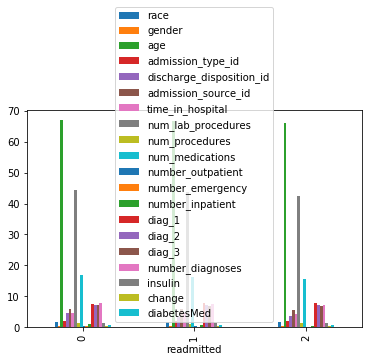

In [22]:

finalDataset.groupby('readmitted').mean().plot(kind='bar')

In [23]:
print(finalDataset.dtypes)

race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int64
diag_2                      int64
diag_3                      int64
number_diagnoses            int64
insulin                     int64
change                      int64
diabetesMed                 int64
readmitted                  int64
dtype: object


In [24]:
num_features = finalDataset.columns

# Remove outliers by class
for response in finalDataset.readmitted.unique(): # For each readmission response
    response_df = finalDataset[finalDataset.readmitted==response] # For all samples that meet the readmission criteria
    for column in response_df[num_features].columns: # Iterate through each feature of the sample
        Q1 = response_df[column].quantile(0.25)
        Q3 = response_df[column].quantile(0.75)
        IQR = Q3-Q1
        if IQR > 0: # And remove features that are outside of Q1 - 1.5IQR or Q3 + 1.5IQR
            response_df = response_df[(response_df[column] > Q1-(1.5*IQR)) & (response_df[column] < Q3+(1.5*IQR))]
            finalDataset = finalDataset.drop(finalDataset[finalDataset.readmitted==response].index, axis=0)
            finalDataset = finalDataset.append(response_df)

In [25]:
finalDataset.shape

(57480, 21)

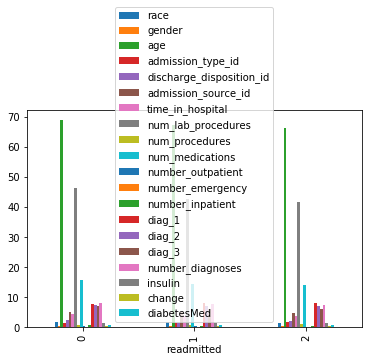

In [26]:

finalDataset.groupby('readmitted').mean().plot(kind='bar')

To increase the performance of classifers, follwoing features are considered.
age                           
discharge_disposition_id       
admission_source_id            
time_in_hospital               
num_lab_procedures             
num_medications                
diag_1                        
diag_2                       
diag_3                      
number_diagnoses